#### importing library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Loading dataset

In [2]:
df = pd.read_csv("C:\\Users\\Sapna\\Downloads\\Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


#### Performing EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 14.1+ KB


In [4]:
#droping User ID column as it is not an important feature
df.pop('User ID')



0      15624510
1      15810944
2      15668575
3      15603246
4      15804002
         ...   
395    15691863
396    15706071
397    15654296
398    15755018
399    15594041
Name: User ID, Length: 400, dtype: int64

In [5]:
#converting categorical values to numerical
df['Gender'] = pd.get_dummies(df['Gender'])

In [6]:
#seperating x and y 
x = df.iloc[:,:-1]
y = df.iloc[:,-1]


#### Feature Scaling

In [7]:
from sklearn import preprocessing
x = preprocessing.StandardScaler().fit_transform(x)
x[0:3]

array([[-1.02020406, -1.78179743, -1.49004624],
       [-1.02020406, -0.25358736, -1.46068138],
       [ 0.98019606, -1.11320552, -0.78528968]])

In [8]:
#Splitting the data into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 1)


#### Selecting the k value.


In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

acc_list = []
err_list = []
for i in range(1,25):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    ypredict = model.predict(x_test)
    acc = accuracy_score(y_test,ypredict)
    acc_list.append(acc)
    err_list.append(1-acc)

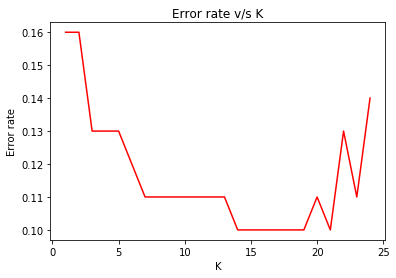

In [10]:
plt.plot(list(range(1,25)),err_list,c= 'r')
plt.title('Error rate v/s K')
plt.xlabel('K')
plt.ylabel('Error rate')
plt.show()

#### Model Building

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier(n_neighbors=7)
knnmodel.fit(x_train,y_train)
ypredict = knnmodel.predict(x_test)


In [12]:
#importing classification metrics
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,ypredict)
cm

array([[50,  8],
       [ 3, 39]], dtype=int64)

In [13]:
acc = accuracy_score(y_test,ypredict)
acc

0.89

In [14]:
predict_output = pd.DataFrame(data = [y_test.values,ypredict],index = ['ytest','ypredict'])
predict_output.transpose()


,ytest,ypredict
0,0,0
1,0,0
2,1,1
3,1,1
4,0,0
...,...,...
95,1,1
96,1,1
97,1,0
98,0,0
